# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# Your code here
from sklearn.datasets import load_boston

In [2]:
boston_raw = load_boston()

/Users/cnieto/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.DataFrame(boston_raw.data, columns=boston_raw.feature_names)

In [5]:
df['MEDV'] = boston_raw.target

In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:>

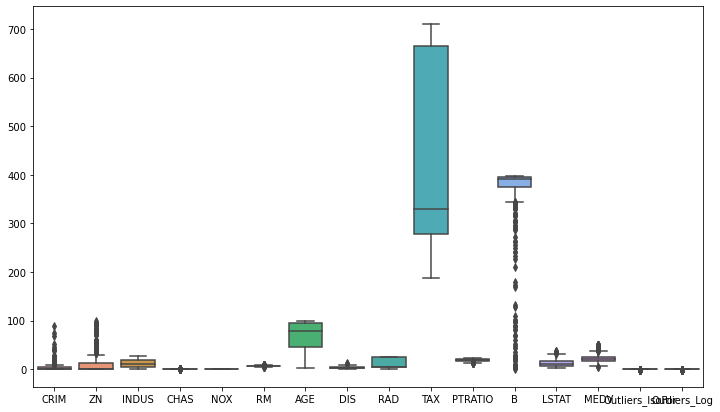

In [23]:
plt.rcParams['figure.figsize'] = (12,7) 
sns.boxplot(data=df)

In [10]:
from sklearn.ensemble import IsolationForest

In [11]:
clf = IsolationForest( max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(df)
df['Outliers_IsoFor'] = preds

In [12]:
df[df.Outliers_IsoFor == -1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Outliers_IsoFor
32,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71,13.2,-1
54,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80,18.9,-1
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81,35.4,-1
123,0.15038,0.0,25.65,0.0,0.581,5.856,97.0,1.9444,2.0,188.0,19.1,370.31,25.41,17.3,-1
126,0.38735,0.0,25.65,0.0,0.581,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26,15.7,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,24.0,666.0,20.2,10.48,19.01,12.7,-1
457,8.20058,0.0,18.10,0.0,0.713,5.936,80.3,2.7792,24.0,666.0,20.2,3.50,16.94,13.5,-1
466,3.77498,0.0,18.10,0.0,0.655,5.952,84.7,2.8715,24.0,666.0,20.2,22.01,17.15,19.0,-1
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,7.0,-1


In [14]:
(len(df[df.Outliers_IsoFor == -1]) / len(df)) * 100

22.727272727272727

In [15]:
from sklearn.neighbors import LocalOutlierFactor

In [16]:
help(LocalOutlierFactor)

Help on class LocalOutlierFactor in module sklearn.neighbors._lof:

class LocalOutlierFactor(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.OutlierMixin, sklearn.neighbors._base.NeighborsBase)
 |  LocalOutlierFactor(n_neighbors=20, *, algorithm='auto', leaf_size=30, metric='minkowski', p=2, metric_params=None, contamination='auto', novelty=False, n_jobs=None)
 |  
 |  Unsupervised Outlier Detection using the Local Outlier Factor (LOF).
 |  
 |  The anomaly score of each sample is called the Local Outlier Factor.
 |  It measures the local deviation of the density of a given sample with respect
 |  to its neighbors.
 |  It is local in that the anomaly score depends on how isolated the object
 |  is with respect to the surrounding neighborhood.
 |  More precisely, locality is given by k-nearest neighbors, whose distance
 |  is used to estimate the local density.
 |  By comparing the local density of a sample to the local densities of its
 |  neighbors, one can identify samples that

In [17]:
lof = LocalOutlierFactor()

In [18]:
df['Outliers_Log'] = lof.fit_predict(df)

In [24]:
len(df[(df.Outliers_Log == -1) & (df.Outliers_IsoFor == -1)])

19

In [35]:
# In the end, we will combine the results of both outlier methods,
# and drop only the rows that are labeled as such by both of them,
# because detecting outliers individually lead us to drop too many rows

In [27]:
rows_outliers = list(df[(df.Outliers_Log == -1) & (df.Outliers_IsoFor == -1)].index)

In [29]:
df.drop(rows_outliers,axis=0,inplace=True)

In [30]:
len(df[(df.Outliers_Log == -1) & (df.Outliers_IsoFor == -1)])

0

In [31]:
# we drop the columns Outliers because we no longer need them

In [32]:
df.drop(['Outliers_Log','Outliers_IsoFor'],axis=1,inplace=True)

In [33]:
df.shape

(487, 14)

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [ ]:
# Your plots here

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [ ]:
# Your response here

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [ ]:
# Your code here

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [ ]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [ ]:
# Your code here

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [ ]:
# Five separate RFR here with the given max depths

Now, plot the score for each tree on the training set and on the testing set.

In [ ]:
# Produce a plot with the score for the testing and training for the different max depths

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here